In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import datetime

datadir = 'Nubes'
categorias = ['Ac', 'As', 'Cb',
              'Cc', 'Ci', 'Cs', 'Ct', 
              'Cu', 'Ns', 'Sc', 'St' ]

IMG_SIZE = 50
#80 me devuelve un 90% con 30 epochs



In [14]:



training_data = []


def create_training_data():
    for category in categorias:
        path = os.path.join(datadir, category) #Nos metemos en la carpeta correspondiente dentro de carpeta_nubes
        class_num = categorias.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
            
        
create_training_data()





    

In [15]:
#img_array = cv2.imread(os.path.join(os.path.join(datadir, 'Altoestrato'), '470_2029612-2.jpg'),
                              #cv2.IMREAD_GRAYSCALE)
#plt.imshow(img_array)

#new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE ))

#plt.imshow(new_array)




In [16]:
print(len(training_data))


2543


In [17]:
import random 
random.shuffle(training_data)#randomiza 


In [21]:
import random 
random.shuffle(training_data)#randomiza 

X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X)   
y = np.array(y)  
X = X/255
#X = X.reshape(-1,IMG_SIZE,IMG_SIZE,1)




import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.3)
 

#X = X.astype('float32')  # dtype of x changed back to numpy float32
#y = y.astype('float32')  # dtype of x changed back to numpy float32

    

    

In [22]:
#import pickle #El modulo pickle implementa protocolos binarios para serializar y deserializar 
#una estructura de objetos Python

#pickle_out = open("X.pickle", "wb") #wb es para excribir los datos
#pickle.dump(X, pickle_out)
#pickle_out.close()

#pickle_out = open("y.pickle", "wb")
#pickle.dump(y, pickle_out)
#pickle_out.close()


#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

#X = pickle.load(open('X.pickle', 'rb')) #rb es para leer los datos ya escritos
#y = pickle.load(open('y.pickle', 'rb'))
print('X shape:', X.shape)
print('y shape:', y.shape)



X shape: (2543, 50, 50, 3)
y shape: (2543,)


In [23]:
#Modelo 

model = Sequential()
#Primera capa
model.add(Conv2D(64, (3,3), 1 , activation = 'relu', input_shape = (IMG_SIZE,IMG_SIZE,3)) ) 
model.add(MaxPooling2D())


#Segunda capa
model.add( Conv2D(128, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())


#Tercera capa
model.add( Conv2D(64, (3,3), 1, activation = 'relu') )
model.add(MaxPooling2D())


#Tercera capa
model.add(Flatten())

#Última capa con 10 neruonas de salida
model.add(Dense(IMG_SIZE, activation = 'relu'))
model.add(Dense(len(categorias), activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size = 32, epochs=50, validation_data=(X_test, y_test))



Train on 1780 samples, validate on 763 samples
Epoch 1/50
1780/1780 [==============================] - 42s 24ms/sample - loss: 2.3463 - accuracy: 0.1421


KeyboardInterrupt: 

In [12]:
# evaluate the model

cvscores = []

scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



accuracy: 34.90%


['loss', 'accuracy']

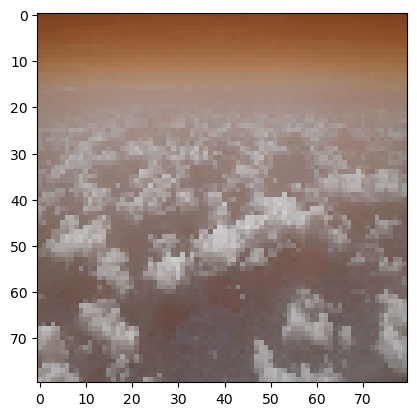

(1, 80, 80, 3)

In [51]:
categorias = ['Ac', 'As', 'Cb',
              'Cc', 'Ci', 'Cs', 'Ct', 
              'Cu', 'Ns', 'Sc', 'St' ]


img_array = cv2.imread('/Users/alexandremartinez/Downloads/clouds-stratocumulus-aerial-view-india.jpg')
#img_array = img_array.astype('float32')
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE) )
plt.imshow(new_array)
plt.show()
#new_array = new_array.astype('float32')
new_array = new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)
new_array = new_array/255
new_array.shape
    

In [52]:
prediction = model.predict([new_array])

y_classes = [np.argmax(element) for element in prediction]

categorias[y_classes[0]]


5

In [56]:
categorias[y_classes[0]]

'Cs'

In [108]:
prediction

array([[1.4446683e-01, 4.9193003e-03, 2.0326386e-04, 2.2270963e-01,
        3.4920147e-01, 9.4313063e-02, 1.6587611e-01, 7.7021576e-04,
        5.1230746e-03, 1.5543379e-05, 1.2401418e-02]], dtype=float32)